# Problem Statement

Customer retention is as crucial as customer acquisition when it comes to increasing revenue. Also we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for the telecom company to know what leads a client towards the decision to leave the company. Also churn prediction allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible so we have 3 tasks:

1. Analyze the customer churn rate for telecom because it is useful to understand why the customers leave.


2. Predictive behavior modeling i.e. to classify if a customer is going to churn or not.


3. Choose the most reliable model that will attach a probability to the churn to make it easier for customer service to target right customer in order to minimize their efforts to prevent churn.


# Importing Required Libraries

In [158]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


# Importing the Data

In [2]:

df = pd.read_csv(r"C:/Users/Samiksha Nayak/OneDrive/Desktop/telecom_churn_data1.csv")


In [3]:

df.head()  # Top 5 records


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:

df.tail()   # Bottom 5 records


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.0
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.0
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.0
99998,7001905007,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,687.065,...,0,1.0,NaN,NaN,NaN,751,0.00,0.00,0.00,0.0


# Understanding the Data

In [5]:

df.shape


(99999, 226)

There are 10,000 rows and 224 attributes present. Moving forward to Data Pre-processing, attributes that are not necessary for our analysis and modeling will be dropped.


In [6]:

df.columns  


Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [7]:

df.info()  # Now let's see the data types of all 14 columns and non-null values present in each


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [44]:
df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [89]:
df.dropna(inplace = True)

df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2.shape

(12368, 226)

Observation: Features in the training data are a lot different in terms of variance and mean. It would be a good idea to perform mean centering and variance scaling if working with models that utilize distance measures.

Check the class imbalance for the month of september:By counting the number of samples for each class, and plotted percentage of churned samples v/s samples that did not churn.

In [53]:
df.loc[:,"jun_vbc_3g"].value_counts(normalize=False).loc[0]

len(df2)-df2.loc[:,"sep_vbc_3g"].value_counts(normalize=False).loc[0]
##df[jun_vbc_3g].value_counts(normalize=False).loc[1]

5467

not_churned:  8387 , churned:  3981


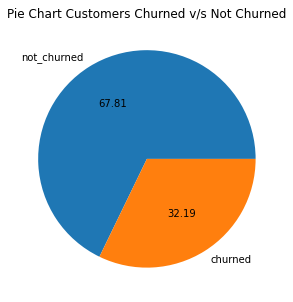

In [86]:
# Checking Imbalance in Data
churned = df[df['Churn']=='yes']['Churn'].count()
not_churned = df[df['Churn']=='no']['Churn'].count()
print('not_churned: ',not_churned,', churned: ',churned)

fig = plt.figure(figsize=(5,5)) 
plt.pie([not_churned,churned], labels=['not_churned','churned'],autopct='%.2f')
plt.title('Pie Chart Customers Churned v/s Not Churned')
plt.show()

Observation: There is a significant imbalance in the two classes of data.

Creating a new column as "churn"

In [88]:
def f(row):
    if row["sep_vbc_3g"] > 0 or row["aug_vbc_3g"]>0 or row["jun_vbc_3g"]>0 or row["jul_vbc_3g"]>0:
        val = 'no'
    else:
        val = 'yes'
    return val

#create new column 'Good' using the function above
df['Churn'] = df.apply(f, axis=1)
df.describe()
df.shape

(12368, 227)

Visualizing the distribution of some features for both the classes:

Minutes of Usage

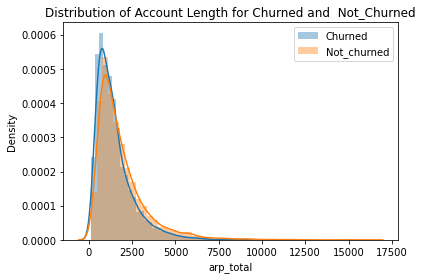

In [103]:
# Plotting minutes for both the class labels
df['arp_total']=df['arpu_6']+df['arpu_7']+df['arpu_8']+df['arpu_9']
mou_churned = df[df['Churn']=='yes']['arp_total']
mou_not_churned =df[df['Churn']=='no']['arp_total' ]
sns.distplot(mou_churned,label='Churned')
sns.distplot(mou_not_churned,label='Not_churned')
plt.title('Distribution of Account Length for Churned and  Not_Churned')
plt.legend()
plt.show()

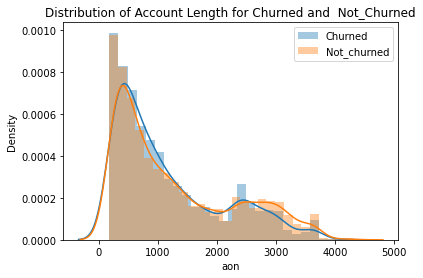

In [100]:
# Plotting aon for both the class labels
aon_churned = df[df['Churn']=='yes']['aon' ]
aon_not_churned =df[df['Churn']=='no']['aon']
sns.distplot(aon_churned,label='Churned')
sns.distplot(aon_not_churned,label='Not_churned')
plt.title('Distribution of Account Length for Churned and  Not_Churned')
plt.legend()
plt.show()

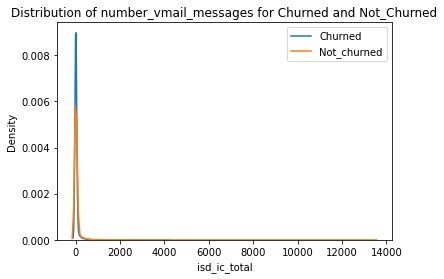

In [111]:
# Plotting PDF of isd_ic_total for both the class labels
df['isd_ic_total']=df['isd_ic_mou_8']+df['isd_ic_mou_9']+df['isd_ic_mou_6']+df['isd_ic_mou_7']
isd_call_churned = df[df['Churn']=='yes']['isd_ic_total']
isd_call_not_churned =df[df['Churn']=='no']['isd_ic_total']
sns.distplot(isd_call_churned,hist=False,label='Churned')
sns.distplot(isd_call_not_churned,hist=False,label='Not_churned')
plt.title('Distribution of number_vmail_messages for Churned and Not_Churned')
plt.legend()
plt.show()
 


### a

In [ ]:
# Building pair plot

sns.pairplot(data,vars=['isd_ic_total','arp_total', 'total_day_charge','total_eve_charge','total_night_charge',            'total_intl_charge','number_customer_service_calls'],hue='churn')



<AxesSubplot:>

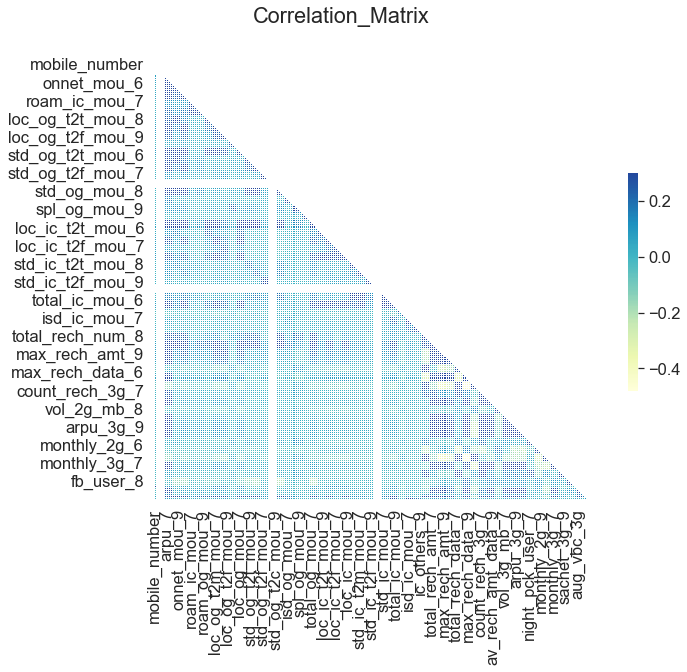

In [113]:
sns.set(style="white", font_scale =1.5)
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Duplication Check

In [105]:

df[df.duplicated()]


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,arp_total




No duplicates present.



### Numerical Columns

In [104]:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
mobile_number,12368.0,7.001201e+09,682213.916539,7.000000e+09,7.000617e+09,7.001200e+09,7.001775e+09,7.002410e+09
circle_id,12368.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,12368.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,12368.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,12368.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
aug_vbc_3g,12368.0,3.204469e+02,533.741520,0.000000e+00,0.000000e+00,9.886000e+01,4.476650e+02,1.291622e+04
jul_vbc_3g,12368.0,3.199222e+02,564.027757,0.000000e+00,0.000000e+00,7.596000e+01,4.294350e+02,9.165600e+03
jun_vbc_3g,12368.0,2.842006e+02,527.442615,0.000000e+00,0.000000e+00,4.893500e+01,3.803950e+02,1.116621e+04
sep_vbc_3g,12368.0,1.384121e+01,64.689717,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.941600e+03


### Categorical Columns

In [106]:

df.describe(include='object')


,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,Churn
count,12368,12368,12368,12368,12368,12368,12368,12368,12368,12368,12368,12368,12368
unique,1,1,1,1,30,30,31,30,30,31,31,30,2
top,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014,no
freq,12368,12368,12368,12368,2692,2577,2269,3988,1119,1027,1030,1064,8387


# Pre-Processing of Data

### Correlation Check

In [107]:

df.corr()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arp_total
mobile_number,1.000000,NaN,NaN,NaN,NaN,0.069423,0.068913,0.068776,0.069607,0.037109,...,-0.033813,-0.038543,-0.034655,-0.026667,0.334863,-0.031095,-0.019137,-0.034656,-0.005607,0.076278
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aug_vbc_3g,-0.031095,NaN,NaN,NaN,NaN,0.267181,0.288011,0.316123,0.281441,0.014990,...,0.110008,0.113531,0.117902,0.119372,0.032953,1.000000,0.709292,0.604830,0.201794,0.318159
jul_vbc_3g,-0.019137,NaN,NaN,NaN,NaN,0.281016,0.333365,0.272959,0.253428,0.014740,...,0.108018,0.112718,0.109063,0.109245,0.038285,0.709292,1.000000,0.685681,0.148911,0.314308
jun_vbc_3g,-0.034656,NaN,NaN,NaN,NaN,0.329336,0.271685,0.261932,0.249611,0.024287,...,0.108761,0.104571,0.102199,0.102632,0.020723,0.604830,0.685681,1.000000,0.142592,0.305967
sep_vbc_3g,-0.005607,NaN,NaN,NaN,NaN,0.097340,0.116134,0.136607,0.195434,-0.002290,...,0.027589,0.029793,0.034007,0.043955,-0.006405,0.201794,0.148911,0.142592,1.000000,0.150982


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
df.Churn.replace(['yes','no'],[1,0],inplace=True)
Y = df['Churn']
X = df.drop('Churn', axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=11)
print('Shape of x_train and y_train: ',x_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',x_test.shape, y_test.shape)


Shape of x_train and y_train:  (11131, 228) (11131,)
Shape of x_test and y_test:  (1237, 228) (1237,)



No two columns show a correlation greater than 0.75. So as theoretically suggested, we are good to go here.


### Insights: 

1. Chances of a non-active member churning out is double the chances of an active member churning out. Company needs to  check with the customers for being inactive , give them some offers plan.

2. Majority of the customers that churned in the month of september


#### Insights: Probability of customers having zero balance churning out is maximum.Many people keep 0 balance no matter how high or low their estimated salary is.

In [144]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [228]:
from numpy import hstack
from sklearn.model_selection import train_test_split  

In [231]:

numerical_fea=['isd_ic_mou_9','isd_ic_mou_9','std_og_t2o_mou','loc_ic_t2o_mou','circle_id','aon','arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9', 'loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','last_day_rch_amt_9']

train_numerical = x_train[numerical_fea]
test_numerical = x_test[numerical_fea]
# Scaling the data using sklearn's Standard scaler
scaler = StandardScaler()
train_numerical_scaled = scaler.fit_transform(train_numerical)
test_numerical_scaled = scaler.fit_transform(test_numerical)

x_train_merged = hstack((isd_ic_mou_9,train_arpu_9, train_aon,train_circle_id,train_std_og_t2o_mou, train_loc_ic_t2o_mou))

x_test_merged = hstack((test_isd_ic_mou_9,test_arpu_9,test_aon, test_circle_id,test_std_og_t2o_mou,train_loc_ic_t2o_mou))

# list of all features
all_features = isd_ic_mou_9_fea + arpu_9_fea + aon_fea + circle_id_fea + std_og_t2o_mou_fea+ loc_ic_t2o_mou_fea

NameError: name 'isd_ic_mou_9' is not defined

In [155]:
# Grid Search To Get Best Hyperparameters 
parameters = {'C':[0.01,0.1,1,3,5,10]} 
svm_clf = SVC(random_state=43) 
grid = GridSearchCV(estimator=svm_clf, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1) 
grid.fit(x_train_merged,y_train)  
cv_result = pd.DataFrame(grid.cv_results_)
plt.scatter(cv_result['param_C'],cv_result['mean_train_score'])
plt.plot(cv_result['param_C'],cv_result['mean_train_score'],label='Train')
plt.scatter(cv_result['param_C'],cv_result['mean_test_score'])
plt.plot(cv_result['param_C'],cv_result['mean_test_score'],label="CV") 
plt.title('Hyperparameter vs accuracy') 
plt.legend() 
plt.xlabel('C') 
plt.ylabel('Accuracy') 
plt.show()


NameError: name 'x_train_merged' is not defined

#### Insight: Maximum customers who churned out have used 1 product only (14% out of total 20%). Maybe bank needs to focus on convincing customers to use more of their services and products.

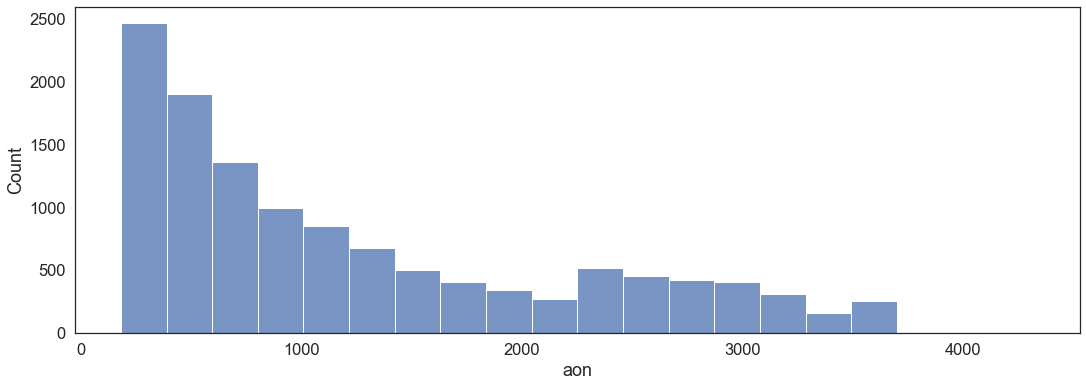

In [166]:

plt.figure(figsize=(18,6))
sns.histplot(data=df,x='aon',bins=20)
plt.show()


#### There is a significant difference in the aon distribution between retained and churned customers.

In [ ]:

# Drop the columns formed for EDA as it's no longer needed. Also drop age and keep logarithmic values instead(age1)

df.drop(columns=['SalaryRange','AgeGroup','Age'],inplace=True)


### 80 percent of the data belongs to retained class .It is Imbalanced data .
### Solution : Use SMOTE to handle this or the Precision -Recall curve should be used not accuracy .

# Predictive Behaviour Modeling

### About 32% of the customers have churned. We need to ensure that the chosen model does predict with great accuracy this 32% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

In [168]:

from sklearn.model_selection import  train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import make_classification


In [170]:

x = df.drop(columns=['Churn'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)
print("Shape of X_train:" ,x_train.shape)
print("Shape of X_test:" ,x_test.shape)


Shape of X_train: (9894, 228)
Shape of X_test: (2474, 228)


In [171]:

unique, count = np.unique(y_train ,return_counts= True)
target_org_valuecount= {k:v for (k,v) in zip (unique,count)}
target_org_valuecount


{0: 6721, 1: 3173}

In [172]:

x_test.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arp_total,isd_ic_total
60919,7001230833,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1018.348,...,1.0,1.0,1.0,916,343.80,1449.08,1342.55,0.00,2302.696,0.00
50791,7001901945,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,704.374,...,1.0,1.0,1.0,1241,797.35,1148.78,971.96,56.62,2407.095,0.00
58512,7000173763,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,42.782,...,1.0,1.0,1.0,772,0.00,0.00,0.00,0.00,200.349,0.00
30037,7001410181,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1212.685,...,1.0,1.0,1.0,3174,589.03,123.12,494.68,30.83,4978.604,0.01
97344,7000906001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,386.307,...,1.0,1.0,1.0,439,312.11,292.52,152.89,26.41,2790.100,0.00


## Encoding and Scaling

In [174]:
categorical_cols=['Churn']
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)])


## SMOTE

In [177]:
!pip install imblearn


^CCollecting imbalanced-learn
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0



In [219]:
import imblearn
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=2000)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import logging

# Logistic Model

In [179]:

logmodel=LogisticRegression()


## Pipeline

In [233]:
from sklearn.ensemble import ExtraTreesClassifier
m = ExtraTreesClassifier(n_estimators = 10)
m.fit(x_train_merged,
      y_train_merged)
sel = SelectFromModel(m, prefit=True)
X_new = sel.transform(x_train_merged)
clf = RandomForestClassifier(5000)

pipe = Pipeline([('m', m),('sel', sel),('X_new', X_new),('clf', clf),])
params = {'clf__max_features': ['auto', 'sqrt', 'log2']}

gs = GridSearchCV(model, params)
gs.fit(x_train_merged,
      y_train_merged)

NameError: name 'x_train_merged' is not defined

In [227]:

y_predicted = pipe.predict(x_test_merged)


NameError: name 'pipe' is not defined

In [187]:

y_predicted


NameError: name 'y_predicted' is not defined

In [188]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))


NameError: name 'y_predicted' is not defined

In [189]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))

print("Testing score: ",pipe.score(x_test, y_test))

print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


NameError: name 'pipe' is not defined

In [ ]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)


In [ ]:

cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()


In [191]:

from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted


NameError: name 'y_predicted' is not defined

In [190]:

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


NameError: name 'fpr_dt' is not defined

<Figure size 432x288 with 0 Axes>

In [192]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve

yhat = pipe.predict_proba(x_test)
precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
plt.figure(dpi=100, figsize=(15, 6))
plt.subplot(121)
sns.lineplot([0, 1], [1, 0], linestyle='--', label='No Skill')
sns.lineplot(recall, precision, marker='.', label=pipe.__class__.__name__)
plt.title("Recall vs Precision Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


NameError: name 'pipe' is not defined

In [193]:

col =['Training Score','Testing Score','MSE score','Accuracy','Precision','Recall','F1-Score']

model_log_report1 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Logistic Regression'])


NameError: name 'pipe' is not defined

# Hyper Parameter Tuning for Decision Tree Using GridSearch CV

In [198]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def dtree_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = [ {'criterion': ['gini', 'entropy'], # measures split quality          
                   'max_features': ['auto', None], # features considered at splits
                   'max_depth': [5, 6, 8, 10,11],  # max nodes in each tree
                   'min_samples_leaf': [5,8, 10,12, 15], # samples required in each leaf
                   'min_samples_split': [5,10,15,20], # samples required to split node
                    } ]
    
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_


# Decision Tree Classifier

In [ ]:

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)


In [ ]:

decision_tree = DecisionTreeClassifier(random_state=52, max_depth=6, criterion = "entropy",
                                   max_features= None,
                                   min_samples_split=15,
                                   min_samples_leaf=12)


In [ ]:

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('decision_tree', decision_tree)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)


In [ ]:

y_predicted = pipe.predict(x_test)


In [ ]:

from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))

print("Testing score: ",pipe.score(x_test, y_test))

print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


In [ ]:

from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted


In [ ]:

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


In [204]:

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()


NameError: name 'y_predicted' is not defined

In [ ]:

model_log_report2 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Decision Tree'])


# Hyper-parameter Tuning for Random Forest Using GridSearchCV

In [205]:

from sklearn.ensemble import RandomForestClassifier


In [ ]:

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

x_train['Gender'] = x_train['Gender'].replace({'Male':1,'Female':0})
x_train['Geography'] = x_train['Geography'].replace({'Germany':1,'France':0,'Spain':2})


In [ ]:

def ran_for_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = [ {'criterion': ['gini', 'entropy'], # measures split quality
                   'n_estimators': [50, 100, 200], # number trees to grow           
                   'max_depth': [6, 8, 10],  # max nodes in each tree
                   'min_samples_leaf': [5, 10, 15], # samples required in each leaf
                   'min_samples_split': [5,8,10], # samples required to split node
                    } ]
    
    # random forest model
    rfor_model=RandomForestClassifier()
    
    #use gridsearch to test all values
    rfor_gscv = GridSearchCV(rfor_model, param_grid, cv=nfolds)
    
    #fit model to data
    rfor_gscv.fit(X, y)
    
    return rfor_gscv.best_params_


In [ ]:

best_par = ran_for_grid_search(x_train,y_train,10)


In [ ]:
best_par

# Random Forest Classifier

In [ ]:

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)


In [206]:

random_forest = RandomForestClassifier(max_depth=10,
                                       n_estimators = 50, random_state=52,
                                       bootstrap=True,
                                       max_features=None,
                                       min_samples_split=5,
                                       min_samples_leaf=5,
                                       criterion='gini')


In [207]:

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                
                       ('random_forest', random_forest)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)


TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE(random_state=2000)' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't

In [ ]:

y_predicted = pipe.predict(x_test)


In [208]:

from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))

print("Testing score: ",pipe.score(x_test, y_test))

print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


NameError: name 'pipe' is not defined

In [209]:

from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted


NameError: name 'y_predicted' is not defined

In [210]:

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


NameError: name 'fpr_dt' is not defined

<Figure size 432x288 with 0 Axes>

In [211]:

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()


NameError: name 'y_predicted' is not defined

In [212]:

model_log_report3 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Random Forest'])


NameError: name 'pipe' is not defined

## Hyper parameter tuning using GridSearch CV

In [213]:

def xgboost_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = [ {
        'learning_rate': [0.01, 0.1, 0.2], # step size for model iteration
        'reg_lambda': [1, 2], # L2 regularization term; higher=more conservative
        'max_depth': [6, 8], # max number of trees deep
        'gamma': [2, 4], # minimum loss reduction on partitions; higher=more conservative
        'subsample': [0.6, 0.8], # ratio of the training used to grow each tree
        'colsample_bytree': [0.7, 0.9], # ratio of columns when constructing each tree
        'n_estimators': [100, 200,250], # number of trees to grow
                  } ]
    
    # XGboost model
    xgboost_model= xgb.XGBClassifier()
    
    #use gridsearch to test all values
    xgboost_gscv = GridSearchCV(xgboost_model, param_grid, cv=nfolds)
    
    #fit model to data
    xgboost_gscv.fit(X, y)
    
    return xgboost_gscv.best_params_


In [214]:

best_par = xgboost_grid_search(x_train,y_train,10)
best_par


NameError: name 'xgb' is not defined

# XG Boost

In [ ]:

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)
                                                    

In [ ]:

import xgboost as xgb

xgb = xgb.XGBClassifier(random_state=52, 
                        colsample_bytree= 0.7,
                        gamma= 4,
                        learning_rate= 0.1,
                        max_depth= 6,
                        n_estimators= 100,
                        reg_lambda= 1,
                        subsample= 0.8)


In [ ]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('smote', smt),
                             ('xgb', xgb)
                         ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)


In [ ]:

y_predicted = pipe.predict(x_test)


In [ ]:

from sklearn.metrics import mean_squared_error as MSE

print("Training score: ",pipe.score(x_train, y_train))
print("Testing score: ",pipe.score(x_test, y_test))
print("MSE score: ",MSE(y_test,y_predicted))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


In [ ]:

from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted


In [ ]:

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='XG Boost(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()


In [ ]:

model_log_report4 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Xgboost'])


# Comparing Models

### We need confidence in our positive class predictions (churn) when taking retention actions.

In [215]:

col =['Training Score','Testing Score','MSE score','Accuracy','Precision','Recall','F1-Score']
model_comp = pd.DataFrame(columns=col)
model_comp = pd.concat((model_log_report1,model_log_report2,model_log_report3,model_log_report4))


NameError: name 'model_log_report1' is not defined

In [234]:

model_comp


,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
